Situación Profesional Logistic Regression Model

https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial/notebook#9.-Split-data-into-separate-training-and-test-set-

Profesor: Ing. Narciso Pérez

Alumna: Carina Giovine

Tecnicatura en Cs de Ds e IA - Cohorte 2020.

SEGUNDA PARTE DE MATRIC DE 200 ELEMENTOS

In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
# Preprocesado, modelado y métricas:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
#generar muestra de 200 valores que siguen una distribución normal
ma_nor=np.random.normal(0,1,200)
ma_nor

array([-0.54699432,  0.36318465, -0.45157955, -0.86148084, -2.07401944,
       -0.96668495,  0.98784299,  1.40822719,  0.18487564, -0.77343178,
       -0.79967169, -0.63062743, -0.49210404, -2.12786481, -1.22438754,
       -0.60027163, -1.73197039,  0.17603778,  0.86405544, -0.33867354,
       -0.01733092,  0.05893925, -0.75304264, -0.53357476,  0.51992231,
        1.38131136,  0.51888417, -0.66175129, -1.91036559,  0.61624776,
       -0.46209532,  1.07680032, -2.2878672 ,  0.06897267,  0.45512306,
       -0.23285419,  0.47590811, -1.38648292,  0.10372251,  0.19791787,
       -0.3179054 ,  2.07786689, -0.31026047, -0.18021553, -1.4754952 ,
       -0.36571009, -0.27306445, -0.88744109, -0.26252818,  0.80719042,
        0.82057244, -2.00239942, -0.60057054, -0.18110631, -1.10946883,
        0.6322098 ,  0.38001899, -0.40378439,  0.04732663, -0.16701614,
        0.12421421,  1.25114467,  0.57169679, -0.20388998, -0.10922993,
        1.03018348,  0.99101832, -0.14079902,  0.60254494,  1.00

In [3]:
#Media
media= np.mean(ma_nor)
media

-0.04156624264399399

In [4]:
# Standard Deviation
r2 = np.std(ma_nor)
r2

0.9505557259886019

In [5]:
# Calculo la varianza del array con distribución normal:
varianza = np.var(ma_nor)
varianza

0.9035561882097182

(array([ 3., 12.,  9., 22., 34., 41., 32., 28., 14.,  5.]),
 array([-2.57818358, -2.11017873, -1.64217388, -1.17416903, -0.70616418,
        -0.23815933,  0.22984551,  0.69785036,  1.16585521,  1.63386006,
         2.10186491]),
 <a list of 10 Patch objects>)

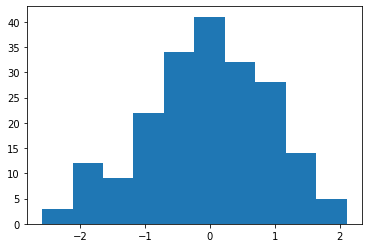

In [6]:
plt.hist(ma_nor)

In [7]:
#uniform distribution - generar muestra de 200 valores que siguen una distribución uniforme
ma_uni=np.random.uniform(0,1,200)
ma_uni

array([0.41425183, 0.25801994, 0.2789936 , 0.81804966, 0.59110084,
       0.93858415, 0.78695665, 0.794133  , 0.0785093 , 0.40829085,
       0.39945666, 0.83401098, 0.64031416, 0.7225634 , 0.54146993,
       0.54514609, 0.4198896 , 0.55879918, 0.79481522, 0.53050893,
       0.70642362, 0.19295603, 0.28830153, 0.17932391, 0.42419   ,
       0.91973455, 0.92778518, 0.49487547, 0.81225609, 0.97424915,
       0.5898806 , 0.6673383 , 0.33668208, 0.44050224, 0.27265179,
       0.31985184, 0.48998549, 0.60561352, 0.37501547, 0.24298024,
       0.51536304, 0.31729747, 0.2119183 , 0.03102426, 0.47340558,
       0.77249161, 0.53331377, 0.32092881, 0.90954668, 0.01538669,
       0.77259804, 0.06750505, 0.54464748, 0.89045953, 0.55950744,
       0.12578261, 0.81283777, 0.85918401, 0.27229672, 0.39652907,
       0.28373068, 0.66457266, 0.1615812 , 0.57682451, 0.2702793 ,
       0.31619143, 0.68497005, 0.77411076, 0.82962559, 0.24489699,
       0.32820379, 0.05550902, 0.41317936, 0.03313874, 0.22034

(array([21., 18., 15., 16., 18., 24., 23., 23., 23., 19.]),
 array([0.00445537, 0.10287573, 0.20129609, 0.29971645, 0.3981368 ,
        0.49655716, 0.59497752, 0.69339788, 0.79181824, 0.8902386 ,
        0.98865896]),
 <a list of 10 Patch objects>)

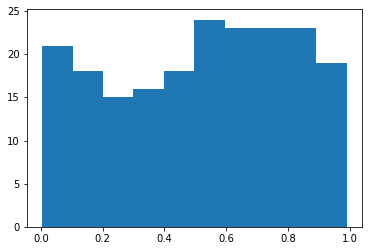

In [8]:
plt.hist(ma_uni)

In [9]:
#creamos datos sesgados
ma_ses=np.random.lognormal(0,1,200)
ma_ses

array([ 1.70199163,  3.28595051,  1.13383426,  4.04951284,  0.62250083,
        2.36654041,  2.82522713,  0.41511491,  0.07847193,  2.71099908,
        2.0699031 ,  1.20123564,  1.40171133,  0.54960902,  1.43742695,
        1.02508754,  1.46853028,  8.436921  ,  1.11002789,  1.26901732,
        0.28262182,  0.40829383,  0.40446411,  0.83233773,  0.95446514,
        3.74135176,  0.42170032,  1.64049208,  0.55991457,  2.90961452,
        0.54359059,  2.140591  ,  0.64795576,  1.49176847,  0.77994254,
       13.22620213,  0.89490986,  0.45266251,  1.27313202,  1.19996909,
        0.424478  ,  2.29066333,  0.05179697,  0.21114922,  0.76407254,
        0.28476684,  1.26266225,  1.93569089,  2.16821528,  2.64427623,
        0.34131761,  0.51837084,  0.62748905,  1.34686788,  0.1249901 ,
       11.11871331,  1.59540729,  1.57748682,  3.57330535,  0.15554486,
        0.6013332 ,  0.57377226,  0.80866341,  0.41637991,  0.08020215,
        1.81808729,  0.39912148,  2.95907748,  2.63790398,  2.82

(array([124.,  46.,  19.,   6.,   2.,   0.,   1.,   0.,   1.,   1.]),
 array([ 0.05179697,  1.36923749,  2.686678  ,  4.00411852,  5.32155903,
         6.63899955,  7.95644007,  9.27388058, 10.5913211 , 11.90876161,
        13.22620213]),
 <a list of 10 Patch objects>)

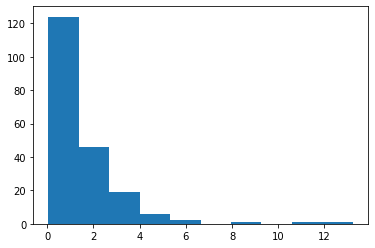

In [10]:
plt.hist(ma_ses)

In [11]:
#uno las tres distribuciones

X_train=np.append([ma_uni],[ma_ses],axis=0)
X_train=np.append(X_train,[ma_nor], axis=0)
X_train

array([[ 4.14251826e-01,  2.58019939e-01,  2.78993597e-01,
         8.18049660e-01,  5.91100837e-01,  9.38584147e-01,
         7.86956655e-01,  7.94133001e-01,  7.85092956e-02,
         4.08290848e-01,  3.99456658e-01,  8.34010984e-01,
         6.40314161e-01,  7.22563396e-01,  5.41469932e-01,
         5.45146094e-01,  4.19889604e-01,  5.58799177e-01,
         7.94815224e-01,  5.30508930e-01,  7.06423621e-01,
         1.92956029e-01,  2.88301530e-01,  1.79323915e-01,
         4.24189999e-01,  9.19734550e-01,  9.27785179e-01,
         4.94875467e-01,  8.12256088e-01,  9.74249150e-01,
         5.89880596e-01,  6.67338304e-01,  3.36682084e-01,
         4.40502239e-01,  2.72651790e-01,  3.19851836e-01,
         4.89985489e-01,  6.05613517e-01,  3.75015471e-01,
         2.42980244e-01,  5.15363040e-01,  3.17297468e-01,
         2.11918300e-01,  3.10242555e-02,  4.73405578e-01,
         7.72491613e-01,  5.33313774e-01,  3.20928809e-01,
         9.09546680e-01,  1.53866867e-02,  7.72598039e-0

In [12]:
# Genero una matriz de Pandas de 20 x 3.

df = pd.DataFrame(list(zip(ma_nor, ma_uni, ma_ses)))
print(df)

            0         1         2
0   -0.546994  0.414252  1.701992
1    0.363185  0.258020  3.285951
2   -0.451580  0.278994  1.133834
3   -0.861481  0.818050  4.049513
4   -2.074019  0.591101  0.622501
..        ...       ...       ...
195 -1.024233  0.580972  0.318860
196 -1.468436  0.083786  0.407067
197  1.284419  0.924963  0.415622
198  0.028009  0.628736  0.995465
199  0.420309  0.708103  1.273644

[200 rows x 3 columns]


In [13]:
#view basic statistical details
df.describe()

,0,1,2
count,200.000000,200.000000,200.000000
mean,-0.041566,0.515059,1.493765
std,0.952941,0.279131,1.641273
min,-2.578184,0.004455,0.051797
25%,-0.631152,0.278842,0.444267
50%,0.012669,0.544897,1.032935
75%,0.623710,0.759234,2.109072
max,2.101865,0.988659,13.226202


In [14]:
# Convierto el dataframe en un array de numpy para usar como X_train:
X_np = df.to_numpy()
X_np

array([[-5.46994323e-01,  4.14251826e-01,  1.70199163e+00],
       [ 3.63184648e-01,  2.58019939e-01,  3.28595051e+00],
       [-4.51579553e-01,  2.78993597e-01,  1.13383426e+00],
       [-8.61480839e-01,  8.18049660e-01,  4.04951284e+00],
       [-2.07401944e+00,  5.91100837e-01,  6.22500831e-01],
       [-9.66684953e-01,  9.38584147e-01,  2.36654041e+00],
       [ 9.87842985e-01,  7.86956655e-01,  2.82522713e+00],
       [ 1.40822719e+00,  7.94133001e-01,  4.15114914e-01],
       [ 1.84875642e-01,  7.85092956e-02,  7.84719312e-02],
       [-7.73431782e-01,  4.08290848e-01,  2.71099908e+00],
       [-7.99671692e-01,  3.99456658e-01,  2.06990310e+00],
       [-6.30627432e-01,  8.34010984e-01,  1.20123564e+00],
       [-4.92104039e-01,  6.40314161e-01,  1.40171133e+00],
       [-2.12786481e+00,  7.22563396e-01,  5.49609024e-01],
       [-1.22438754e+00,  5.41469932e-01,  1.43742695e+00],
       [-6.00271629e-01,  5.45146094e-01,  1.02508754e+00],
       [-1.73197039e+00,  4.19889604e-01

In [15]:
# array de 20 x 1 para y_train:
y_np = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1, 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
y_np

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [16]:
# Separo en grupos de entrenamiento y testeo.
X_train, X_test, y_train, y_test = train_test_split(X_np,y_np,test_size=0.2)

In [17]:
# muestro los tamaños de los sets que separé para entrenar y testear el modelo
print('X_train:',len(X_train))
print('X_test:  ',len(X_test))
print('y_train:',len(y_train))
print('y_test:  ',len(y_test))

X_train: 160
X_test:   40
y_train: 160
y_test:   40


Text(0, 0.5, 'Distribución Normal')

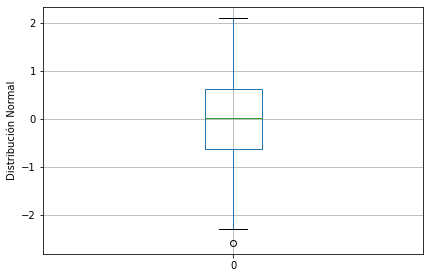

In [18]:
# draw boxplots to visualize outliers.
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
fig = df.boxplot(column=0)
fig.set_title('')
fig.set_ylabel('Distribución Normal')

Text(0, 0.5, 'Distribución Uniforme')

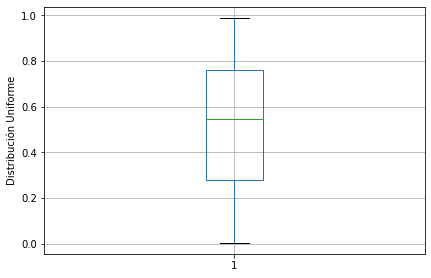

In [19]:
# draw boxplots to visualize outliers.
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
fig = df.boxplot(column=1)
fig.set_title('')
fig.set_ylabel('Distribución Uniforme')

Text(0, 0.5, 'Distribución Sesgada')

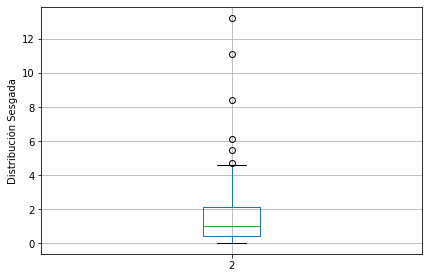

In [20]:
# draw boxplots to visualize outliers.
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
fig = df.boxplot(column=2)
fig.set_title('')
fig.set_ylabel('Distribución Sesgada')

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
escalar = StandardScaler()

In [23]:
#fit_transform, esta instrucción realiza el calculo respectivo y a su vez transforma y devuelve los datos ya escalados.
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [24]:
#Defino el algoritmo a utilizar
algoritmo = LogisticRegression()

In [25]:
#entrenamos el modelo utilizando la instrucción fit y los datos tanto de “X” como de “y” de entrenamiento.

algoritmo.fit(X_train, y_train)

LogisticRegression()

In [26]:
#finalmente realizamos una predicción, utilizando la instrucción predict y los datos de prueba.
y_pred = algoritmo.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [27]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[ 8 14]
 [ 5 13]]


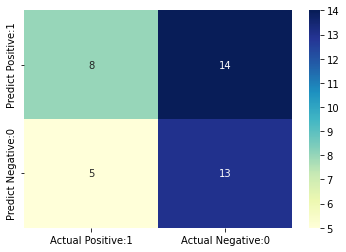

In [28]:
# Visualizamos la Matriz de Confusión:
matrix = pd.DataFrame(data=matriz, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(matrix, annot=True, fmt='d', cmap='YlGnBu')

--------------------------------------------------------------------------------
-- Cantidad de datos que el modelo predijo correctamente.

*La matriz nos indica que cuenta con 8 datos verdaderos positivos, es decir datos que en los datos reales eran 1 y el modelo los predijo bien.

*Por su parte el valor 13 indica el dato verdadero negativo, esto quiere decir datos reales que eran 0 y el modelo los predijo como tal.

-- Veamos ahora la cantidad de datos que el modelo no predijo correctamente.

*Comencemos con los datos falsos negativos, en total fueron de 14.

*En cuanto a los datos falsos positivos fueron 5 datos, que era en realidad 0 y el modelo lo predijo como 1.

In [29]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.48148148148148145


-------------------------------------------------------------------------------
Calculemos ahora la exactitud del modelo, por lo que debemos ahora importar accuracy_score, de la misma librería de metrics.

In [30]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.525


-------------------------------------------------------------------------------
Veamos ahora la sensibilidad o lo que también se le conoce como recall del algoritmo, para ello importamos recall_score.

In [31]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.7222222222222222


--------------------------------------------------------------------------------
Calculemos ahora el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.

In [32]:
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred)
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.5777777777777777
